In [41]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from konlpy.tag import Okt



okt=Okt()
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rc('axes', unicode_minus=False)
df =pd.read_csv('./전세사기 세부내용_네이버지식인.csv')
print(df.shape)
df.head()

NameError: name 're_nouns' is not defined

In [25]:
sorce_txt = ' '.join(df['질문'].drop_duplicates())
sorce_txt[-100:]

'요?예를들어 이러이러한 부분이 이상하면 전세사기일 가능성이 높다..라는 부분이 있는지..너무 복잡하고 불안하고.. 미치겠네요..남양주 전세사기 소송하려면 어디로 가는게 좋을까요..'

In [33]:
#데이터 전처리 
#1. 명사 형용사 동사 추출
okt=Okt()
n_a_v =[w for w,p in okt.pos(sorce_txt,stem=True) if p in ['Noun','Adjective','Verb']]
print(n_a_v[:10])

['사기', '당하다', '인터넷', '카페', '들어가다', '보다', '상황', '좋다', '않다', '분']


In [36]:
#2. 불용어 처리 stop word 만들기
n_a_v_1=list(set(n_a_v))
with open ('stop_word.txt','w') as f:
    for i in n_a_v_1:
        f.write(f'{i}\n')
len(n_a_v_1)

1284

In [45]:
# stop_word.txt를 불러오기
with open('./stop_word.txt') as f:
    stop_word=[i.strip() for i in list(f)]
stop_word

['전세사기',
 '부터',
 '좀',
 '상',
 '쯤',
 '반',
 '를',
 '주',
 '친',
 '판',
 '애',
 '하다',
 '되다',
 '있다',
 '전세',
 '사기',
 '수',
 '없다',
 '이다',
 '현재',
 '받다',
 '어떻다',
 '제',
 '않다',
 '알다',
 '것',
 '같다',
 '것 같다',
 '싶다']

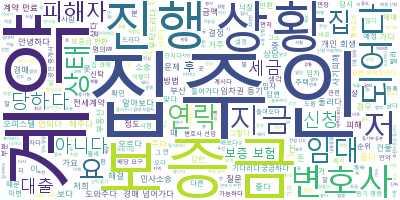

In [46]:
res_txt = [i for i in n_a_v if i not in stop_word]
res = ' '.join(res_txt)
wc = WordCloud("C:/windows/fonts/malgun.ttf",
               background_color = "white",
               max_words = 2000)
               #stopwords = stopwords)
wordFre= wc.generate(res) # str자료만 가능, list자료는 안됨
wordFre.to_image()

In [47]:
import pickle

In [51]:
with open('최종전처리텍스트.pickle', 'wb') as f:
    pickle.dump(res, f,protocol=pickle.HIGHEST_PROTOCOL)

In [52]:
with open('./최종전처리텍스트.pickle','rb') as f:
    nouns=pickle.load(f)
nouns

'당하다 인터넷 카페 들어가다 보다 상황 좋다 분 개인 회생 신청 저 정보 알아보다 개인 회생 신청 해 고제 돈 신용카드 카드 론 쓰다 더 빚 개인 회생 진행 사무실 추천 주시 곳 문의 진행 집다 인천 세종 지금 자금 모두 잃다 형사고소 서두르다 자금 제대로 돌리다 민사소송 꼭 필요하다 혹시 세종 다른 지역 발생 관련 경험 민사 변호사 계시다 요 민사소송 꼭 세종 임대 돈 도와주다 당하다 민사소송 생각 민사소송 이유 경매 피해자 인정 등등 변호사 비용 만 고민 안녕하다 대전 살 살 대학생 얼마 전 당하다 개인 회생 알아보다 개인 회생 처음 도대체 뭐 모르다 대학생 신청 가능하다 요 개인 회생 얼마나 탕감 크게 당하다 개인 회생 대해 해결 책 지금 상황 억울하다 갚다 맞다 건지다 진짜 모르다 인터넷 보다 집주인 돈 돌려주다 아니다 지금 갚다 상황 혹시 알 계시다 상세 답변 부탁드리다 부모님 서도 모르다 그냥 저 혼자 해결 시작 모르다 당하다 돈 돌리다 찾아보다 손해배상 청구 형사고소 돈 이렇다 처음 고소 진행 어렵다 변호사 선임 도움 질문 드리다 혹시 변호사 혼자 고소하다 돈 돌리다 오피스텔 민사소송 진행 요 깡통 피의자 사기혐의 고발 상황 저 지금 보증금 못 피해자 해도 명 정도 막막하다 상황 오피스텔 민사소송 진행 단체 소송 차라리 지금 거주 중인 집 인수 방법 아버지 가해자 드리다 야하다 보증금 이자 붙다 오늘 분 오다 저희 집 사진 찍다 뭐 작성 가다 경매 넘어가다 문제 저희 집 명의 아빠 작다 아빠 명의 저희 엄마 명의 파산 개인 회생 찾아보다 개인 회생 채무 재산 많다 꾸준하다 수입 그렇다 아빠 꾸준하다 수입 지금 은행 대출 수입 개인 회생 안되다 이제 궁금하다 엄마 개인 회생 엄마 꾸준하다 수입 대출 뭐 밀리다 명의 아니다 대출 엄마 개인 회생 알 지금 엄마 적금 깨다 정도 줄 지금 피해자 주다 해도 집 경매 넘어가다 요 저 알바 미성년 자라 도와주다 슬프다 만약 집 경매 넘어가다 보증금 피해자 주다 남다 돈 경매 넘어가다 저희 새롭다 집 구해 이제

In [2]:
sample= [
    '스토리가 진짜 너무 노잼',
    '심오한 똥이란 말이 딱이다',
    '쓰레기같은 영화 ㄹㅇ 시간아깝다',
    '점도 아깝다 ㄹㅇ쓰레기 영화',
    '이 드러운 기분을 어쩌지',
    '이건 명작임',
    '이런 느낌 영화 좋아요',
    '죽기전에 봐야할 영화',
    '뻔한 로코가아님 대사가 아주 좋아요',
    '안봤으면 후회했을거같다감동이다'
]

In [8]:
# pre_s에서 명사 추출
pre_s=' '.join(sample)
pre_s

'스토리가 진짜 너무 노잼 심오한 똥이란 말이 딱이다 쓰레기같은 영화 ㄹㅇ 시간아깝다 점도 아깝다 ㄹㅇ쓰레기 영화 이 드러운 기분을 어쩌지 이건 명작임 이런 느낌 영화 좋아요 죽기전에 봐야할 영화 뻔한 로코가아님 대사가 아주 좋아요 안봤으면 후회했을거같다감동이다'

In [10]:
nouns = okt.nouns(pre_s)
nouns

['스토리',
 '진짜',
 '노잼',
 '똥',
 '말',
 '쓰레기',
 '영화',
 '시간',
 '점도',
 '쓰레기',
 '영화',
 '이',
 '기분',
 '이건',
 '명작',
 '임',
 '느낌',
 '영화',
 '영화',
 '로코',
 '대사',
 '아주',
 '후회',
 '감동']

In [17]:
okt = Okt()
[w for w,p in okt.pos(pre_s,stem=True) if p in ['Noun','Adjective','Verb']]

['스토리',
 '진짜',
 '노잼',
 '심오하다',
 '똥',
 '말',
 '딱이다',
 '쓰레기',
 '같다',
 '영화',
 '시간',
 '아깝다',
 '점도',
 '아깝다',
 '쓰레기',
 '영화',
 '이',
 '드럽다',
 '기분',
 '이건',
 '명작',
 '임',
 '이렇다',
 '느낌',
 '영화',
 '좋다',
 '죽다',
 '보다',
 '야하다',
 '영화',
 '뻔하다',
 '로코',
 '아니다',
 '대사',
 '아주',
 '좋다',
 '보다',
 '후회',
 '하다',
 '같다',
 '감동']

In [ ]:
df=pd.